In [27]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [28]:
from sklearn.datasets import load_iris

In [29]:
iris=load_iris()

In [30]:
X=iris.data

In [31]:
Y=iris.target

In [32]:
iris_data=DataFrame(X,columns=['Sepal Length','Seapl Width','Petal Length','Petal Width'])

In [33]:
iris_target=DataFrame(Y,columns=['Species'])

In [34]:
def flower(num):
    if num==0:
        return'Setosa'
    elif num==1:
        return 'Veriscolour'
    else:
        return 'Virginica'

In [35]:
iris_target['Species']=iris_target['Species'].apply(flower)

In [36]:
iris=pd.concat([iris_data,iris_target],axis=1)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [39]:
logreg=LogisticRegression()

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=3)

In [41]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
from sklearn import metrics

In [44]:
Y_pred=logreg.predict(X_test)

In [45]:
Y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1])

In [46]:
metrics.accuracy_score(Y_test,Y_pred)

0.93333333333333335

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn=KNeighborsClassifier(n_neighbors=6)

In [49]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [50]:
Y_pred=knn.predict(X_test)

In [51]:
metrics.accuracy_score(Y_test,Y_pred)

0.94999999999999996

In [52]:
knn=KNeighborsClassifier(n_neighbors=1)

In [53]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [54]:
Y_pred=knn.predict(X_test)

In [55]:
metrics.accuracy_score(Y_test,Y_pred)

0.96666666666666667

In [56]:
k_range=range(1,90)
accuracy=[]

In [57]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

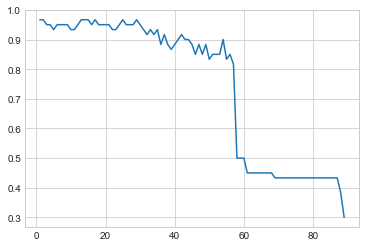

In [58]:
plt.plot(k_range,accuracy)